In [2]:
# IMPORTS
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# import standardscaler
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

# modeling function import
from model import modeling_reg2

# import metrics
from sklearn.metrics import mean_squared_error

# imports for classifier
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, BaggingRegressor
from sklearn.tree import DecisionTreeRegressor

# import PCA
from sklearn.decomposition import PCA

In [43]:
# read in batter training data
batter_train = pd.read_csv('../Modeling_Data/batter_data_modeling.csv')
# read in batter testing data
batter_test = pd.read_csv('../Modeling_Data/batter_test_data.csv')

In [44]:
# split data in TTS
X_train = batter_train.drop(columns=['Name', 'Team', 'POS', 'PTS', 'FPPG'])
y_train = batter_train['FPPG']
# testing 
X_test = batter_test.drop(columns=['Name', 'Team', 'Pos', 'PTS', 'FPPG'])
y_test = batter_test['FPPG']

In [45]:
# polynomnial features
pf = PolynomialFeatures(degree=3)
# fit and transform
X_train_pf = pf.fit_transform(X_train)
X_test_pf = pf.transform(X_test)

In [46]:
# scale data
sc = StandardScaler()
# fit and transform X
X_train_sc = sc.fit_transform(X_train_pf)
X_test_sc = sc.transform(X_test_pf)

In [47]:
# PCA
pca = PCA(n_components=20)
# fit 
pca.fit(X_train_sc)

PCA(n_components=20)

In [48]:
# fit transform 
Z_train = pca.transform(X_train_sc)
Z_test = pca.transform(X_test_sc)

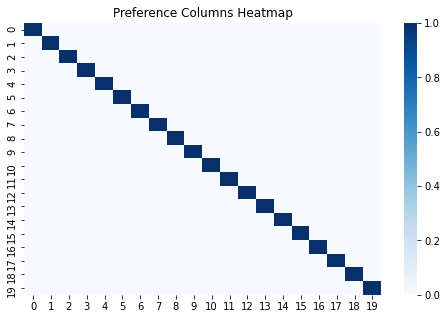

In [53]:
plt.figure(figsize=(8,5))
sns.heatmap(data=pd.DataFrame(Z_train).corr(), cmap='Blues')
plt.title('Preference Columns Heatmap');

In [49]:
# instaniate all models
linreg = LinearRegression()
knn = KNeighborsRegressor()
svc = SVR()
forest = RandomForestRegressor()
tree = DecisionTreeRegressor()
abc = AdaBoostRegressor()
bag = BaggingRegressor()

In [50]:
# create list of classifiers
class_list = [linreg, knn, svc, forest, tree, abc, bag]

In [51]:
results = modeling_reg2(batter_train, Z_train, y_train, batter_test, Z_test, y_test, class_list)

In [52]:
results

,Baseline - RMSE,Model - RMSE,R2 Score - Train,R2 Score - Test
LinearRegression(),3.078159,3.249809,0.874127,0.325476
KNeighborsRegressor(),3.078159,3.612163,0.916028,0.166671
SVR(),3.078159,3.074152,0.882136,0.396423
RandomForestRegressor(),3.078159,3.248816,0.988074,0.325888
DecisionTreeRegressor(),3.078159,3.524496,1.000000,0.206630
AdaBoostRegressor(),3.078159,3.324000,0.915941,0.294326
BaggingRegressor(),3.078159,3.228537,0.983870,0.334277


---

In [54]:
# read in pitcher training data
pitcher_train = pd.read_csv('../Modeling_Data/pitcher_data_modeling.csv')
# read in batter testing data
pitcher_test = pd.read_csv('../Modeling_Data/pitcher_test_data.csv')

In [55]:
# split data in TTS
X_train = pitcher_train.drop(columns=['Name', 'Team', 'POS', 'PTS', 'AVG', 'FPPG'])
y_train = pitcher_train['FPPG']
# testing 
X_test = pitcher_test.drop(columns=['Name', 'Team', 'Pos', 'PTS', 'AVG', 'FPPG'])
y_test = pitcher_test['FPPG']

In [56]:
# polynomnial features
pf = PolynomialFeatures(degree=3)
# fit and transform
X_train_pf = pf.fit_transform(X_train)
X_test_pf = pf.transform(X_test)

In [57]:
# scale data
sc = StandardScaler()
# fit and transform X
X_train_sc = sc.fit_transform(X_train_pf)
X_test_sc = sc.transform(X_test_pf)

In [58]:
# PCA
pca = PCA(n_components=20)
# fit 
pca.fit(X_train_sc)

PCA(n_components=20)

In [59]:
# fit transform 
Z_train = pca.transform(X_train_sc)
Z_test = pca.transform(X_test_sc)

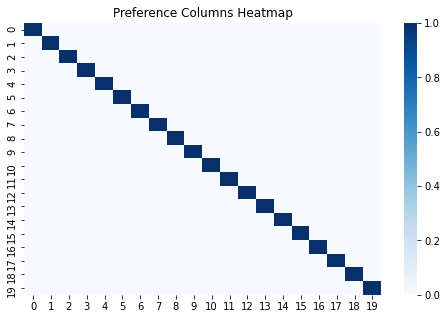

In [60]:
plt.figure(figsize=(8,5))
sns.heatmap(data=pd.DataFrame(Z_train).corr(), cmap='Blues')
plt.title('Preference Columns Heatmap');

In [61]:
# instaniate all models
linreg = LinearRegression()
knn = KNeighborsRegressor()
svc = SVR()
forest = RandomForestRegressor()
tree = DecisionTreeRegressor()
abc = AdaBoostRegressor()
bag = BaggingRegressor()

In [62]:
# create list of classifiers
class_list = [linreg, knn, svc, forest, tree, abc, bag]

In [64]:
results = modeling_reg2(pitcher_train, Z_train, y_train, pitcher_test, Z_test, y_test, class_list)

In [65]:
results

,Baseline - RMSE,Model - RMSE,R2 Score - Train,R2 Score - Test
LinearRegression(),9.344332,11.641235,0.866456,-0.078672
KNeighborsRegressor(),9.344332,10.639370,0.932051,0.099004
SVR(),9.344332,12.760960,0.744418,-0.296158
RandomForestRegressor(),9.344332,7.186851,0.989198,0.588880
DecisionTreeRegressor(),9.344332,7.303649,1.000000,0.575409
AdaBoostRegressor(),9.344332,7.391134,0.890370,0.565176
BaggingRegressor(),9.344332,6.897984,0.980790,0.621265


# Note:
Overall these scores are not improving upon the baseline RMSE.